<a href="https://colab.research.google.com/github/Kimgabe/AIFFEL_Online_Quest/blob/main/Quest06(Team_PJ)/Person_set_profile_upgraded_ver_231120.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ⚙️ 기본 셋팅

In [179]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [180]:
|!pip install python-dotenv
!pip install openai

In [181]:
from dotenv import load_dotenv
import os
# .env 파일 로드
load_dotenv('/content/drive/MyDrive/AIFFEL_QUESTs/gabe.env')

# 환경 변수 사용
api_key = os.getenv('OPENAI_API_KEY')

# 클래스 작성 및 실행

## 프로필 정보 입력 클래스 : Profile

---

In [186]:
# 프사 이미지 및 파일관리 관련
from PIL import Image as PILImage
import sys
import requests
import random
import os
from ipywidgets import FileUpload
from IPython.display import display, clear_output, Image

# 입력받은 문자 전처리 및 결과 출력 관련
import pandas as pd
import re


class Profile:
    # 생성자
    def __init__(self):  # 추가로 들어갈 예정(name, age...)
        # 초기 속성 설정
        self.name = None  # 이름
        self.age = None   # 나이
        self.mbti = None  # MBTI
        self.profile_image = None  # 프로필 이미지
        # 프사 미입력시 사용할 사
        self.default_images = [
            "/content/drive/MyDrive/AIFFEL_QUESTs/random_profile1.jpg",
            "/content/drive/MyDrive/AIFFEL_QUESTs/random_profile2.jpg",
            "/content/drive/MyDrive/AIFFEL_QUESTs/random_profile3.jpg"
        ]
        self.recent_interest = None  # 최근 관심사
        self.career_interest = None  # 희망 진로
        self.field_of_interest = None  # 관심 분야
        self.hobbies = None  # 취미
        self.gender = None  # 성별
        self.residence = None # 지역
        self.marriage = None # 혼인
        self.guild = None # 길드
        self.nickname = None # 별명
        self.favorite_movies = None  # 좋아하는 영화 목록
        self.favorite_facilitator = '정은 퍼실님😀'

    # 프로필 정보(상위 메서드)
    def set_profile(self):
        print("안녕하세요~! 프로필 설정을 시작하기 전에, 따뜻한 인사를 전합니다! 🌼", "\n")
        print("다소 입력이 많아 귀찮으실 수 있지만 멋진 결과를 제공해드릴게요!","\n")

        self.profile_img()  # 프사 사진
        self.set_mbti()  # mbti
        self.set_others() # 나머지 프로필 정보 일괄 입력 받기
        self.set_interests()

        """
    set_profile의 하위 메서드들
    1. profile_img
    2. set_mbti
    3. set_others
        3-1. hobby 입력
        3-2. residence
        3-3. marriage
        3-4. guild
        3-5. gender
        3-6. age
        3-7. nickname
        3-8. favorite_facilitator
        3-9. favorite_movies
        3-10. set_interest
            3-10-1. recent_interests_info
            3-10-2. career_interests_info
            3-10-3. field_interests_info
            3-10-4. _get_interest_input : set_interest 하위 메서드
    """

    """
    1. 프로필 이미지
    """

    # 파일이미지 일괄처리 위한 메서드 추가
    def resize_and_save_image(self, image_path, output_size=(300, 300)):
        try:
            img = PILImage.open(image_path)
            img = img.resize(output_size, PILImage.ANTIALIAS)

            base_name, ext = os.path.splitext(image_path)
            resized_image_path = f"{base_name}_resized{ext}"

            img.save(resized_image_path)
            return resized_image_path
        except IOError:
            print("이미지 파일을 처리하는 데 문제가 발생했습니다.")
            return None

    # url이미지 가져오기
    def download_image(self, url):
        response = requests.get(url, stream=True)
        if response.status_code == 200:
            file_name = url.split("/")[-1] + ".jpg"
            with open(file_name, 'wb') as f:
                f.write(response.content)
            return file_name
        else:
            print("이미지 다운로드 실패")
            return None

    # 기본 이미지로 설정하기
    def set_default_image(self):
        # 구글 드라이브에 이미지 가져오기
        self.profile_image = random.choice(self.default_images)


    def profile_img(self):
        if self.profile_image is not None:
            return

        print("당신의 프사를 업로드해주세요! 꼭 프사가 아니어도 좋아요!😀")

        # Google Colab 환경 체크 및 파일 업로드
        if 'google.colab' in sys.modules:
            from google.colab import files
            uploaded = files.upload()

            if not uploaded:  # 업로드 취소 시 기본 이미지 중 랜덤으로 설정
                self.set_default_image()
            else:
                filename = next(iter(uploaded))
                self.profile_image = filename
                resized_image_path = self.resize_and_save_image(filename)
                print(f"이미지가 저장되었습니다: {resized_image_path}")

        # Jupyter Notebook 환경에서 파일 업로드
        else:
            try:
                from ipywidgets import FileUpload
                from IPython.display import display, clear_output
                uploader = FileUpload(accept='.jpg,.png', multiple=False)
                display(uploader)

                def on_upload_change(change):
                    if not uploader.value:  # 업로드 취소 시 기본 이미지 설정
                        self.set_default_image()
                        clear_output(wait=True)
                        return

                    uploaded_file = next(iter(uploader.value.values()))
                    file_name = uploaded_file['metadata']['name']
                    with open(file_name, 'wb') as f:
                        f.write(uploaded_file['content'])
                    self.profile_image = file_name

                    resized_image_path = self.resize_and_save_image(file_name)
                    print(f"이미지가 저장되었습니다: {resized_image_path}")
                    clear_output(wait=True)

                uploader.observe(on_upload_change, names='value')
            except ImportError:
                print("이 환경에서는 파일 업로드 기능을 사용할 수 없습니다.")

    """
    2. MBTI 프로필 입력 받는 곳
    """

    def set_mbti(self):
      # 입력예시로 사용할 정보
      mbti_list = ['1. INTJ', '2. INTP', '3. ENTJ', '4. ENTP', '5. INFJ', '6. INFP',
                  '7. ENFJ', '8. ENFP', '9. ISTJ', '10. ISFJ', '11. ESTJ', '12. ESFJ', '13. ISTP', '14. ISFP', '15. ESTP', '16. ESFP']

      # 정보 출력
      mbti_dict = {str(i+1): mbti.split('. ')[1] for i, mbti in enumerate(mbti_list)}
      output = [", ".join(mbti_list[i:i+4]) for i in range(0, len(mbti_list), 4)]
      output_string = "\n".join(output)

      print('='*100, '\n')  # 입력 시작을 알리는 구분선 출력
      # 정보 입력 받기
      while True:
          print(output_string)
          p_mbti = input('\n당신의 MBTI는 무엇인가요?! 위 리스트를 보고 번호 또는 문자를 입력해주세요⌨️ :  \n')

          if re.search("[가-힣]", p_mbti):
              print('+'*100, '\n')  # 잘못된 입력을 알리는 구분선 출력
              print('MBTI는 영어로만 입력해주세요~! 다시 입력 부탁드립니다.')
              continue

          if p_mbti in mbti_dict:
              p_mbti = mbti_dict[p_mbti]
          else:
              p_mbti = p_mbti.upper()
              if p_mbti not in [mbti.split('. ')[1] for mbti in mbti_list]:
                  print('+'*100, '\n')  # 잘못된 입력을 알리는 구분선 출력
                  print("유형에 없는 MBTI네요. 다시 입력해주세요 :D")
                  continue

          self.mbti = p_mbti  # 클래스의 mbti 속성 업데이트
          print(f'당신의 MBTI는 {self.mbti}군요! 만나서 반가워요!')
          print('='*100, '\n')  # 정상 입력 완료를 알리는 구분선 출력
          break


    """
    3. 기타 프로필 정보 일괄 입력 받기
    """

    def set_others(self):
      print('='*100, '\n')  # 입력 시작을 알리는 구분선 출력

      # 이름 입력 및 예외 처리
      while True:
          self.name = input('\n당신의 이름을 입력해주세요~!\n')
          if all('가' <= char <= '힣' or char.isspace() for char in self.name):
              break
          else:
              print('+'*100, '\n')  # 잘못된 입력을 알리는 구분선 출력
              print('이름은 한글과 공백만 포함할 수 있습니다. 다시 입력해주세요.')

      print('='*100, '\n')  # 정상 입력 완료를 알리는 구분선 출력

      """
      3-1. 취미
      """
      # 취미 입력
      hobby_list = {1: '운동', 2: '요리', 3: '음악', 4: '여행', 5: '독서', 6: '기타'}
      hobby = ''
      while hobby == '':
          print('='*100, '\n')  # 입력 시작을 알리는 구분선 출력
          for k, v in hobby_list.items():
              print(f'{k}. {v}', end='  ')
          print('\n' + '='*100)  # 예시 출력 후 구분선

          hobby_input = input('\n당신의 취미를 숫자 혹은 문자로 입력해주세요!⌨️ : \n')
          if hobby_input.isdigit() and int(hobby_input) in hobby_list:
              if int(hobby_input) == 6:
                  etc = ''
                  while etc.isdigit() or etc == '':
                      print('='*100, '\n')  # 입력 시작을 알리는 구분선 출력
                      etc = input('\n리스트에 없는 취미를 가지고 계신다면 그 취미를 입력하세요. : \n')
                      self.hobbies = etc # 입력받은 정보 업데이트
                      if etc.isdigit() or etc == '':
                          print('+'*100, '\n')  # 잘못된 입력을 알리는 구분선 출력
                          print('취미는 숫자나 공백이 될 수 없습니다.')
                  hobby = etc  # 여기에 hobby 값을 업데이트
                  self.hobbies = hobby
              else:
                  hobby = hobby_list[int(hobby_input)]  # 여기에 hobby 값을 업데이트
                  self.hobbies = hobby
          else:
              print('+'*100, '\n')  # 잘못된 입력을 알리는 구분선 출력
              print('올바른 번호 또는 취미명을 입력해주세요.')
          print('='*100, '\n')  # 정상 입력 완료를 알리는 구분선 출력


      """
      3-2. 거주지
      """
      region = ''
        # 3-2. 거주지역 입력
        # 입력 받을 때 까지 진행

      while region == '':
        region = input('\n사시는 지역(도시)가 어디신가요?! 🎤 : \n')

        # 공백인 경우 오류 출력
        if region == '':
          print('사는 지역은 공백이 될 수 없습니다. 귀찮으시더라도 입력을 꼭해주세요!')

        # 한글 or 한글+공백 을 제외한 모든 경우에 대한 처리
        # 특수문자, 및 기타언어 포함
        # '가' <= char <= '힝' : 문자가 한글 범위(한글 유니코드 기준)인지 확인
        # char.isspace() : 입력받은 문자가 공백인지 확인 : 공백 포함한 입력 허용 ex) 서울시 종로구
        # all(..) : list comprehension 내 모든 조건을 만족해 True인지 판별
        # 결론 : 한글범위에 있지 않거나, 문자가 공백을 포함하지 않고 있는 경우 = 한글과 공백 외의 문자가 포함된 경우

        elif not all('가' <= char <= '힣' or char.isspace() for char in region):
          print('한글로만 입력해주세요.')

      # 입력받은 데이터 최종 입력
      self.residence = region
      print('-'*100)


      """
      3-3. 결혼여부
      """
      # 혼인 여부 입력
      marry = ''
      while marry not in ['1', '2']:
        print('='*100, '\n')  # 입력 시작을 알리는 구분선 출력
        marry = input("\n결혼 여부를 입력해주세요⌨️ (1: 기혼, 2: 미혼) : \n")

        # 각각의 경우 처리
        if marry == '1':
          self.marriage = '기혼'
        elif marry == '2':
          self.marriage = '미혼'
        else:
          print('+'*100, '\n')  # 잘못된 입력을 알리는 구분선 출력
          print('1 또는 2를 입력해주세요.')
      print('='*100, '\n')  # 정상 입력 완료를 알리는 구분선 출력


      """
      3-4. 길드명
      """
      # 길드 입력 (숫자로 입력받기 & 퍼실님 이름 검증 체계개선)
      guild_dict = {1: '응', 2: '힌튼', 3: '하사비스'}
      while True:
          print('='*100, '\n')  # 입력 시작을 알리는 구분선 출력
          try:
              guild_number = int(input('\n당신이 속해있는 길드를 숫자로 입력해주세요⌨️. (1: 응, 2: 힌튼, 3: 하사비스): \n'))
              if guild_number in guild_dict:
                  self.guild = guild_dict[guild_number]
                  break  # 길드 번호가 유효하면 루프를 종료
              else:
                  print('+'*100, '\n')  # 잘못된 입력을 알리는 구분선 출력
                  print('아이펠 온라인 7기에 존재하지 않는 길드입니다.')
          except ValueError:
              print('+'*100, '\n')  # 잘못된 입력을 알리는 구분선 출력
              print('숫자로 입력해주세요.')

      # 퍼실님 이름 입력 및 확인
      # print(f'맞아요! {self.guild} 길드의 담당 퍼실님은 {facil_input}님이에요:)') 에서 수정 -> '영빈님?!, '영빈님이요' 등의 입력에 대한 처리가 번거로워서...
      print('='*100, '\n')  # 입력 시작을 알리는 구분선 출력
      facil_input = input(f'\n그렇다면 {self.guild} 길드의 퍼실님의 성함을 입력해주세요🎤 : \n')
      if self.guild == '응' and '광석' in facil_input:
          print(f'맞아요! {self.guild} 길드의 담당 퍼실님은 광석님이에요:)')
      elif self.guild == '힌튼' and '정은' in facil_input:
          print(f'맞아요! {self.guild} 길드의 담당 퍼실님은 정은님이에요:)')
      elif self.guild == '하사비스' and '영빈' in facil_input:
          print(f'맞아요! {self.guild} 길드의 담당 퍼실님은 영빈님이에요:)')
      else:
          print('+'*100, '\n')  # 잘못된 입력을 알리는 구분선 출력
          print(f'우리 {self.guild} 길드에 그런 퍼실님은 안 계세요...😑')
      print('='*100, '\n')  # 입력 완료 구분선 출력


      """
      3-5. 성별
      """
      print('='*100, '\n')  # 입력 시작을 알리는 구분선 출력
      # 성별 입력
      gd = ''
      while gd == '' or gd.isdigit():
          gd = input('\n성별을 입력해주세요🎤 : \n')
          if gd == '' or gd.isdigit():
              print('+'*100, '\n')  # 잘못된 입력을 알리는 구분선 출력
              print('성별은 필수 입력 값이며, 숫자일 수 없습니다. 다시 입력해주세요.')
          elif gd in ['남', '남자']:
              self.gender = '남자'
              print('='*100, '\n')  # 정상 입력 완료를 알리는 구분선 출력
              break
          elif gd in ['여', '여자']:
              self.gender = '여자'
              print('='*100, '\n')  # 정상 입력 완료를 알리는 구분선 출력
              break
          else:
              print('+'*100, '\n')  # 잘못된 입력을 알리는 구분선 출력
              print('올바른 성별을 입력해주세요. (예: 남자, 여자)')


      """
      3-6. 나이
      """
      print('='*100, '\n')  # 입력 시작을 알리는 구분선 출력
      # 나이 입력
      import datetime
      d = datetime.datetime.now()

      while True:
          try:
              age_input = input('\n나이가 어떻게 되세요? 만 나이 혹은 태어난 년도로 말해주세요.^^ : \n')
              self.age = float(age_input)

              # 나이숫자별 오입력에 대한 처리
              if len(age_input) in [1, 2]:
                  print(f'만 {int(self.age)}세이시군요. 생일이 지나시면 {int(self.age) + 1}세가 되시겠네요~')
                  break

              elif len(age_input) == 4:
                  print(f'{int(self.age)}년에 태어나셨군요. 동안이시네요!')
                  self.age = d.year - int(self.age)
                  print(f'만 {int(self.age)}세이시군요. 생일이 지나시면 {int(self.age) + 1}세가 되시겠네요~')
                  break

              elif len(age_input) >= 5 or self.age <= 0:
                  raise ValueError('올바르지 않은 나이 또는 연도입니다.')

              # 최종 self에 전달할때
              self.age = str(int(self.age))  # 32.0 -> 32 -> '32'

          except ValueError as e:
              print(e)
              print('나이나 태어나신 연도를 올바르게 입력해주세요!')

          except Exception as e:
              print(f'알 수 없는 오류가 발생했습니다. {e}')

      print('='*100, '\n')  # 입력 완료를 알리는 구분선 출력



      """
      3-7. 별명
      """
      print('='*100, '\n')  # 입력 시작을 알리는 구분선 출력
      # 별명 입력
      nick = ''
      nick_reason = ''
      nick_dic = {}
      while nick.isdigit() or nick == '':
          nick = input('\n당신의 별명은 무엇인가요? \n')
          if nick.isdigit() or nick == '':
              print('+'*100, '\n')  # 잘못된 입력을 알리는 구분선 출력
              print('문자로 입력해주세요.')
          else:
              while nick_reason.isdigit() or nick_reason == '':
                  nick_reason = input(f'\n당신의 별명이 {nick}인 이유도 알 수 있을까요? \n')
                  if nick_reason.isdigit() or nick_reason == '':
                      print('+'*100, '\n')  # 잘못된 입력을 알리는 구분선 출력
                      print('문자로 입력해주세요.')
                  else:
                      nick_dic.setdefault(nick, nick_reason)
                      self.nickname = nick_dic
                      print('='*100, '\n')  # 정상 입력 완료를 알리는 구분선 출력

      """
      3-7. 좋아하는 영화
      """
      print('='*100, '\n')  # 입력 시작을 알리는 구분선 출력

      # MBTI 유형별 영화 정보 추천 위한 데이터
      mbti_movie_preferences = {
          "ISTJ": {"세상소금형", "역사", "사극"},
          "ISFJ": {"임금 뒤 권력형", "교육", "문화"},
          "INTJ": {"과학자형", "미스터리"},
          "INFJ": {"예언자형", "드라마", "연속극"},
          "ISTP": {"백과사전형", "사회풍자적 메시지가 있는"},
          "ISFP": {"성인군자형", "애니메이션", "만화"},
          "INFP": {"잔다르크형", "판타지"},
          "INTP": {"아이디어 뱅크형", "과학"},
          "ESTP": {"수완 좋은 활동가형", "액션"},
          "ESFP": {"사교적 유형", "뮤지컬"},
          "ENFP": {"스파크형", "어드밴처"},
          "ENTP": {"발명가형", "블랙 코미디"},
          "ESTJ": {"사업가형", "법정드라마"},
          "ESFJ": {"친목도모형", "하이틴", "우정"},
          "ENFJ": {"언변 능숙형", "로맨스 코미디"},
          "ENTJ": {"지도자형", "스릴러", "공포"}
      }

      # 입력받은 MBTI 유형에 따른 영화 장르 추천 문구 작성 및 input 받기
      if self.mbti in mbti_movie_preferences:
          # 입력받은 mbti로 key선택
          mbti_info = mbti_movie_preferences[self.mbti]
          mbti_type = mbti_info.pop()  # mbti유형별 설명 추출
          genres = ", ".join(mbti_info)  # 장르들 문자열로 전환 후 ','로 이어 붙이기

          # 유형별 선호 장르 출력 문구 설정
          print('='*100, '\n')  # 장르 추천 문구 출력 전 구분선 출력
          print(f"보통 {self.mbti}는 '{mbti_type} 유형으로 {genres} 장르를 좋아한다고 합니다.")
          print('='*100, '\n')  # 장르 추천 문구 출력 후 구분선 출력

          # 정보 input 요구
          favorite_movie_input = input(f"\n{mbti_type} 유형인 당신! 당신의 인생영화는 무엇인가요? : \n")
          self.favorite_movies = favorite_movie_input
          print('='*100, '\n')  # 입력 완료를 알리는 구분선 출력


      """
      3-8. 좋아하는 퍼실님
      """
      print('='*100, '\n')  # 입력 시작을 알리는 구분선 출력
      while True:
          # 좋아하는 퍼실 입력 받기
          facilitator_input = input('\nAIFFEL에서 당신이 가장 좋아하는 퍼실님은 누군가요?!(당신의 센스를 믿습니다.😂)\n')

          # 정은 퍼실님 아닐경우 드립 1번..
          if '정은' not in facilitator_input:
              print("정말이세요?! 전 여전히 당신의 센스를 믿어요(?!) 다시 한번만 생각해 보시죠?! 😒")
              second_chance = input("\n다시 한 번 '자알~'생각해 볼까요? 우리.. 코어잖아요...? : \n")

              # 두번째도 입력
              # 정은 퍼실님 입력한 경우 그대로 favorite_facilitator로 입력
              if '정은' in second_chance:
                  #self.favorite_facilitator = second_chance
                  print("정은님을 가장 좋아하는군요! 사회생활 좀 할 줄 아시네요..?!😼 ㅋㅋㅋ")
                  break
              # 아닌 경우도 다른 입력값 그대로 favorite_facilitator로 설정
              else:
                  print(f"{self.name}님, 님 T에요...? 눈치 챙겨..😡")
                  break
          # 처음부터 정은 퍼실님 입력한 경우 그대로 favorite_facilitator로 설정
          else:
              #self.favorite_facilitator = facilitator_input
              print(f"역시 정은 퍼실님을 가장 좋아하는군요! 멋진 선택입니다.😊")
              break

      print('='*100, '\n')  # 입력 완료를 알리는 구분선 출력
      # self.favorite_facilitator에 업데이트하지않아요. 어차피 답정너거든요 ㅋㅋㅋ




    """
    3-10. 관심사들
    """

    # interest 관련 항목들 입력받을때 출력되고 정보 입력받는 공통 메서드
    def set_interests(self):
        """
        관심사 입력 처리
        """
        print('='*100, '\n')  # 입력 시작을 알리는 구분선 출력
        recent_interests_info = ['\n'
            '1. 데이터 과학', '2. 인공지능', '3. 클라우드 컴퓨팅', '4. 사이버 보안', '5. 기타' '\n']
        career_interests_info = ['\n'
            '1. 데이터 분석가', '2. 머신러닝 엔지니어', '3. 데이터 엔지니어', '4. AI 연구원', '5. 창업''\n']
        field_interests_info = ['\n'
            '1. 머신러닝', '2. 딥러닝', '3. 컴퓨터 비전', '4. 자연어 처리', '5. 로봇공학''\n']

        # 최근 관심사 입력
        self.recent_interest = self._get_interest_input(recent_interests_info, "\n최근 관심사를 선택해주세요~! ⌨️: \n")

        # 관심 진로 입력
        self.career_interest = self._get_interest_input(career_interests_info, "\n관심 진로를 선택해주세요~! ⌨️: \n")

        # 관심 분야 입력
        self.field_of_interest = self._get_interest_input(field_interests_info, "\nAI 관련 관심 분야를 선택해주세요~! ⌨️: \n")

    """
    3-10-4. _get_interest_input
    """
    def _get_interest_input(self, interests_info, prompt):
        """
        관심사 선택을 위한 공통 입력 처리 메서드
        """
        while True:
            print('='*100, '\n')  # 입력 시작을 알리는 구분선 출력
            print("\n".join(interests_info))
            print("0. 직접 입력하기")
            choice = input(f"\n{prompt} (또는 직접 입력하고 싶다면 0번을 입력해주세요): ")

            if choice == '0':
                custom_interest = input('관심사를 입력해주세요: ')
                print('='*100, '\n')  # 정상 입력 완료를 알리는 구분선 출력
                return custom_interest
            elif choice.isdigit() and 1 <= int(choice) <= len(interests_info):
                print('='*100, '\n')  # 정상 입력 완료를 알리는 구분선 출력
                return interests_info[int(choice) - 1].split('. ')[1]
            else:
                print('+'*100, '\n')  # 잘못된 입력을 알리는 구분선 출력
                print('올바른 번호를 선택해주세요.')

    """
    3-11. 입력받은 프로필 정보 출력
    """
    # 프로필 출력 by dataframe

    def display_info(self):

        # 프로필 이미지 출력
        if hasattr(self, 'profile_image') and self.profile_image:
            display(PILImage.open(self.profile_image))
        else:
            print("프로필 이미지가 설정되지 않았습니다.")

        # 프로필 정보를 DataFrame으로 생성
        profile_data = {
            '항목': ['이름', '나이', '성별', '취미', 'MBTI', '인생영화', '좋아하는 퍼실', '최근관심사', '관심커리어','관심AI분야'],
            '정보': [getattr(self, 'name', '정보 없음'),
                    getattr(self, 'age', '정보 없음'),
                    getattr(self, 'gender', '정보 없음'),
                    getattr(self, 'hobbies', '정보 없음'),
                    getattr(self, 'mbti', '정보 없음'),
                    getattr(self, 'favorite_movies', '정보 없음'),
                    self.favorite_facilitator,
                    getattr(self, 'recent_interest', '정보 없음'),
                    getattr(self, 'career_interest', '정보 없음'),
                    getattr(self, 'field_of_interest', '정보 없음'),
                   ]
        }
        profile_df = pd.DataFrame(profile_data)

        # 프로필 정보 출력
        display(profile_df)

## 루틴 정보 입력 클래스 - Routine

In [187]:
import time

class Routine:
    def __init__(self):
        self.routine = {"아침": {}, "점심": {}, "저녁": {}}

    def daily_routine(self):
        time_of_day_names = ["아침", "점심", "저녁"]

        print("아침, 점심, 저녁의 일과를 순서대로 입력할게요!\n")

        for time_of_day_name in time_of_day_names:
            time.sleep(0.5)
            print(f"\n{time_of_day_name} 시간의 루틴을 입력합니다.\n")

            categories = {
                1: {"name": "일상", "description": "일상적인 활동을 포함한 루틴 - 식사, 청소, 요리 등"},
                2: {"name": "업무", "description": "경제활동"},
                3: {"name": "학업", "description": "학문적인 활동 및 아이펠 노드 예습/복습"},
                4: {
                    "name": "취미활동 및 자기계발",
                    "description": (
                        "\n-운동(러닝, 요가, 헬스, 등산...)\n"
                        "-문화활동(독서, 영화, 음악, 연극 감상, 맛집투어...)\n"
                        "-창작활동(글쓰기, 영상제작(유튜브), 요리, 뜨개질...)\n"
                        "-기타(가드닝...)"
                    ),
                }
            }

            while True:
                time.sleep(1)
                print("\n카테고리별로 일과를 입력할 수 있습니다\n")

                for key, value in categories.items():
                    time.sleep(0.5)
                    print(f"{key}. {value['name']}: {value['description']}")

                time.sleep(1)

                category_choice = int(input("\n작성하고 싶은 일과에 해당하는 번호를 입력하세요 : \n"))

                if category_choice not in categories:
                    print("올바른 카테고리 번호를 입력하세요.")
                    continue

                category_name = categories[category_choice]["name"]
                details = input("\n작성하고 싶은 내용을 입력하세요: \n")

                if category_name not in self.routine[time_of_day_name]:
                    self.routine[time_of_day_name][category_name] = [details]
                else:
                    self.routine[time_of_day_name][category_name].append(details)

                add_more = input("\n계속해서 루틴을 입력하시겠습니까? (1: 계속, 2: 중단): \n")

                if add_more != '1':
                    break

        print("\n일과 입력을 마칩니다!")

    def print_routine(self):
        print("\n현재 루틴 정보:")
        for time_of_day_name, details in self.routine.items():
            print(f"\n{time_of_day_name} 시간의 루틴:")
            for category, activities in details.items():
                print(f"{category}: {', '.join(activities)}")

## 프로필 입력 받고 하루 일과를 출력하는 클래스 : Person
### 두개의 클래스(Profile, Routin)의 기능화 정보를 승계받은 child class

- 프로필 정보와, 루틴 정보를 한번에 입력받아 그 결과를 가공하여 출력하는 메서드 추가

In [188]:
import openai
import os

class Person(Profile, Routine):
    def __init__(self):
        Profile.__init__(self)
        Routine.__init__(self)

        self.set_profile()
        self.daily_routine()

    def collect_info(self):
        info_dict = {
            'name': self.name,
            'age': self.age,
            'mbti': self.mbti,
            'profile_image': self.profile_image,
            'recent_interest': self.recent_interest,
            'career_interest': self.career_interest,
            'field_of_interest': self.field_of_interest,
            'hobbies': self.hobbies,
            'gender': self.gender,
            'residence': self.residence,
            'marriage': self.marriage,
            'guild': self.guild,
            'nickname': self.nickname,
            'favorite_movies': self.favorite_movies,
            'routine': self.routine
        }

        # routine 정보를 문자열로 변환
        routine_str = ""
        for time_of_day, activities in info_dict['routine'].items():
            activities_str = "; ".join(
                [f"{category}: {', '.join(details)}" for category, details in activities.items()])
            routine_str += f"{time_of_day}: {activities_str}\n"

        info_dict['routine_str'] = routine_str
        return info_dict

    def generate_essay(self, info_dict):
        # OpenAI API 키 설정
        openai.api_key = os.getenv("OPENAI_API_KEY")

        prompt = f"""
        {info_dict['name']}의 프로필:
        나이: {info_dict['age']}, 성별: {info_dict['gender']}, MBTI: {info_dict['mbti']}, 취미: {info_dict['hobbies']},
        최근 관심사: {info_dict['recent_interest']}, 관심 진로: {info_dict['career_interest']},
        관심 분야: {info_dict['field_of_interest']}, 거주지: {info_dict['residence']},
        결혼 여부: {info_dict['marriage']}, 속한 길드: {info_dict['guild']}, 별명: {info_dict['nickname']},
        좋아하는 영화: {info_dict['favorite_movies']}.

        {info_dict['name']}의 하루:
        {info_dict['routine_str']}

        이 정보를 바탕으로 {info_dict['name']}의 하루 일과에 대해 김영하 작가님의 스타일로 에세이를 작성해주세요.
        소개문구는 필요 없고, 오로지 본문만 제공해주면 됩니다.
        """

        response = openai.ChatCompletion.create(
            model="gpt-4",  # 적절한 모델 이름 사용
            messages=[
                {"role": "system", "content": "You are an assistant who can write a essay like human written"},
                {"role": "user", "content": prompt}
            ]
        )

        # 챗봇 API 응답 구조에 맞게 에세이 추출
        essay = response['choices'][0]['message']['content']
        formatted_output = "\n".join(essay.split(". "))  # 마침표 뒤에 공백과 함께 문장 분리
        print("="*100)
        return formatted_output

    def print_all_info(self):
        print('=' * 100, '\n')
        choice = input("\n1. Simple 버전, 2. Fancy 버전 중 선택: \n")

        if choice == '1':
            self.display_info()
            self.print_routine()
            # 경계선 출력
            print('=' * 100)
            # 이미지 출력
            display(Image(filename='/content/drive/MyDrive/AIFFEL_QUESTs/ask_for.jpg'))
            # 추가 질문 출력
            fancy_choice = input("\n우리가 만든 Fancy버전도 진짜 괜찮은데 한번만 확인해주시면 안될까요?!' (1. 볼게요. 2. 괜찮아요): \n")
            # 사용자의 선택에 관계없이 Fancy 버전 출력
            if fancy_choice == '1' :
                info_dict = self.collect_info()
                essay = self.generate_essay(info_dict)
                print(essay)
            elif fancy_choice == '2':
              print('\n한게 아까워서라도 봐주세요.. 주말 동안 이것만 했단 말이에요..좀 만 기다려 줘요....\n')
              print("="*100)
              print("="*100)
              info_dict = self.collect_info()
              essay = self.generate_essay(info_dict)
              print(essay)

        elif choice == '2':
            info_dict = self.collect_info()
            essay = self.generate_essay(info_dict)
            print(essay)
        else:
            print("잘못된 선택입니다.")

# 테스트

안녕하세요~! 프로필 설정을 시작하기 전에, 따뜻한 인사를 전합니다! 🌼 

다소 입력이 많아 귀찮으실 수 있지만 멋진 결과를 제공해드릴게요! 

당신의 프사를 업로드해주세요! 꼭 프사가 아니어도 좋아요!😀


<ipython-input-186-23d57a723efd>:80: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(output_size, PILImage.ANTIALIAS)


Saving gabe_sample.jpg to gabe_sample (2).jpg
이미지가 저장되었습니다: gabe_sample (2)_resized.jpg

1. INTJ, 2. INTP, 3. ENTJ, 4. ENTP
5. INFJ, 6. INFP, 7. ENFJ, 8. ENFP
9. ISTJ, 10. ISFJ, 11. ESTJ, 12. ESFJ
13. ISTP, 14. ISFP, 15. ESTP, 16. ESFP

당신의 MBTI는 무엇인가요?! 위 리스트를 보고 번호 또는 문자를 입력해주세요⌨️ :  
인프제
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 

MBTI는 영어로만 입력해주세요~! 다시 입력 부탁드립니다.
1. INTJ, 2. INTP, 3. ENTJ, 4. ENTP
5. INFJ, 6. INFP, 7. ENFJ, 8. ENFP
9. ISTJ, 10. ISFJ, 11. ESTJ, 12. ESFJ
13. ISTP, 14. ISFP, 15. ESTP, 16. ESFP

당신의 MBTI는 무엇인가요?! 위 리스트를 보고 번호 또는 문자를 입력해주세요⌨️ :  
5
당신의 MBTI는 INFJ군요! 만나서 반가워요!



당신의 이름을 입력해주세요~!
승순


1. 운동  2. 요리  3. 음악  4. 여행  5. 독서  6. 기타  

당신의 취미를 숫자 혹은 문자로 입력해주세요!⌨️ : 
6


리스트에 없는 취미를 가지고 계신다면 그 취미를 입력하세요. : 
책읽기, 요리하기, 쓸데없는거 코딩해서 프로그램만들기, 고양이랑 놀기, 여행가기, 산책


사시는 지역(도시)가 어디신가요?! 🎤 : 
서울
----------------------------------------------------------------------------------------------------


결혼 여부를 입력해주세요⌨️ (1:

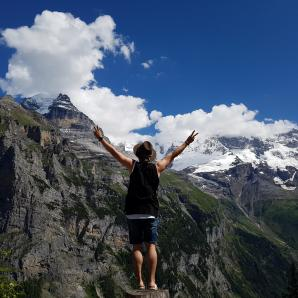

,항목,정보
0,이름,승순
1,나이,35
2,성별,남자
3,취미,"책읽기, 요리하기, 쓸데없는거 코딩해서 프로그램만들기, 고양이랑 놀기, 여행가기, 산책"
4,MBTI,INFJ
5,인생영화,로버트 드 니로의 인턴!
6,좋아하는 퍼실,정은 퍼실님😀
7,최근관심사,어떻게 하면 생산성을 높여서 시간을 효율적으로 쓸수있을까? 와 피드백을 통한 성장
8,관심커리어,데이터 분석가
9,관심AI분야,LLM과 추천시스템



현재 루틴 정보:

아침 시간의 루틴:
일상: 스트레칭 후 강변산책 1시간, 집안일하고 고양이랑 놀아주기
업무: 데이터 가공 아르바이트

점심 시간의 루틴:
학업: 그루분들과 아이펠 노드 학습

저녁 시간의 루틴:
일상: 저녁 식사후 1시간 휴식
학업: 데이터 가공 및 분석 아르바이트, 공부한 내용 복습하며 옵시디언에 정리
취미활동 및 자기계발: 공부한 내용 정리해서 작성하고 데이터 블로그에 업로드


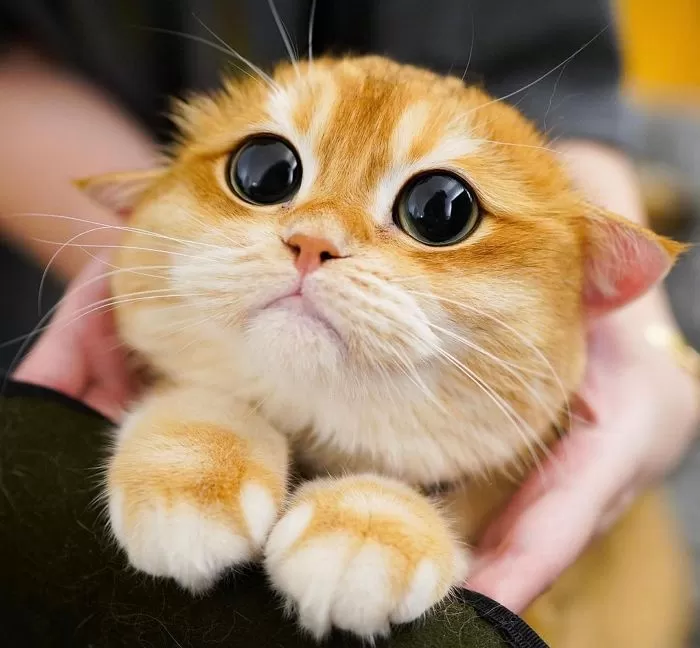


우리가 만든 Fancy버전도 진짜 괜찮은데 한번만 확인해주시면 안될까요?!' (1. 볼게요. 2. 괜찮아요): 
2

한게 아까워서라도 봐주세요.. 주말 동안 이것만 했단 말이에요..좀 만 기다려 줘요....

나는 이른 아침, 승순의 붉은 얼굴이 베개에서 빠져나오는 것을 본다
그의 눈은 평소보다 한층 더 깊어보였다
나는 그의 눈빛에서 하루를 시작하는 결심과 의지를 보았다
그는 아주 조금의 움직임으로 서서히 몸을 일으켜 세우며 베란다를 향해 발길을 돌린다
그의 첫 번째 일과는 스트레칭과 강변산책이다


세상은 아직 잠들어 있는데, 그는 이미 여의도의 강변에서 스스로를 분발하고 있다
그는 몸을 뒤틀며, 강물의 흐름에 맞춰 걷는다
그의 모습은 어딘가 쓸쓸하면서도 용감하게 보였다
그 다음은 집안 일과 고양이와 놀이, 그리고 그의 한 줄기 빛, 데이터 가공 아르바이트다
데이터는 그에게 현실적인 항목보다는 가상의 세계와 같았다.

그런 그가 점심을 마치고, 학문의 세계로 들어선다
그루분들과 함께 아이펠 노드 학습은 그의 일상 중 가장 설레는 순간이다
숫자와 문자, 그리고 코드를 해석하고 연결시키는 과정은 그를 잠시 현실에서 멀리 떠나게 하였다
그는 이 순간을 좋아했다
그의 표정에서는 학문에 대한 열정과 애정이 묻어나왔다.

저녁이 되면 그의 일상이 다시 돌아온다
그는 저녁식사 후 1시간 동안 휴식을 취하며 건강을 챙긴다
그리고 다시 연구과제를 시작한다
그가 가장 중요하게 생각하는 것은 데이터 분석가로서의 성장이다
그리고 복습, 옵시디언에 정리, 그리고 데이터 블로그에 업로드까지
그의 하루는 늘 공부에 몰두하는 것으로 마무리된다.

그의 가장 큰 관심사는 '어떻게 하면 생산성을 높여서 시간을 효율적으로 쓸 수 있을까?' 이다
그는 이 질문을 통해 자신의 성장을 이끄는 동력을 얻는다
그의 최대 희망은 데이터 분석가로서 성공하고, 이를 통해 사람들에게 도움을 주는 것이다
그의 눈빛은 항상 밝고 찬란하다
그는 매일 자신의 삶을 최선으로 살아가며, 자신의 가치를 찾아가고 있다

In [189]:
# 사용 예시
info = Person() # 클래스 객체 생성 및 정보 입력받기
info.print_all_info() # 정보 출력